# Haberman's Survival Data

Row Data Description:
    1.Age of patient at time of operation (numerical)
    2.Patient's year of operation (year - 1900, numerical)
    3.Number of positive axillary nodes detected (numerical)
    4.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

cancer= pd.read_csv('haberman.csv', names=['age','operation_year','axil_nodes','survived'])

####  Convert the survived fields to True and False for better understanding


In [46]:
cancer['survived']=cancer['survived'].replace({1:True,2:False})
cancer.describe()

,age,operation_year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [47]:
cancer['survived'].value_counts()
#percentage of dependent variables
cancer['survived'].value_counts()[False]/cancer['survived'].value_counts()[True]


0.36

# Conclusions:
        - 36% of the patients died within 5 years
        - 64% of the patients survived

#### A good starting point would be pair plots.

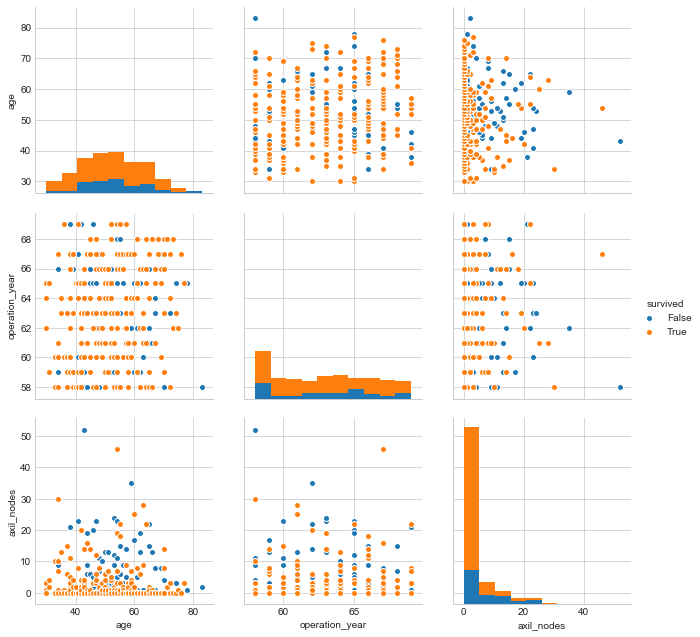

In [48]:
sns.set_style('whitegrid')

# for some reason the dependent variable(Survived) was also being shown on the pair plots 
# had to use the vars variable to get rid of it.
sns.pairplot(cancer,hue='survived',size=3,vars=['age','operation_year','axil_nodes'])
plt.show()

### Conclusions:
      1. Irespective of age/operation_year, its quite evident that when a patient had zero axil_nodes its more likely they                survived.
      2. I couldn't deduce much as there is no possibility of seperating the dead/survived linearly.
    

Explore More!

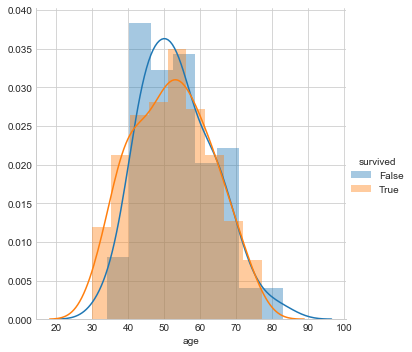

In [49]:
t=sns.FacetGrid(cancer,hue='survived',size=5).map(sns.distplot,'age').add_legend();
plt.show()

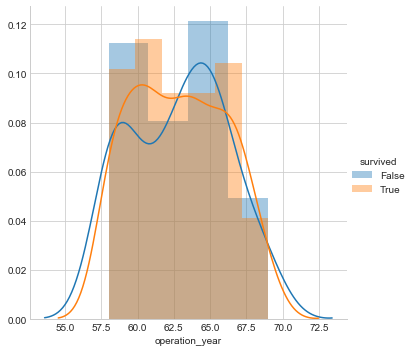

In [50]:
sns.FacetGrid(cancer,hue='survived',size=5).map(sns.distplot,'operation_year').add_legend()
plt.show()

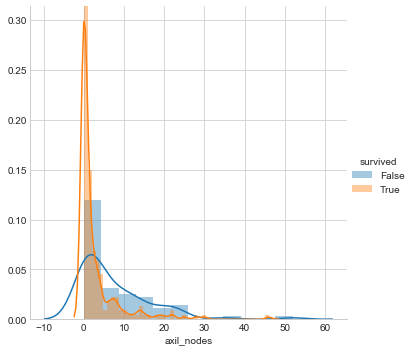

In [51]:
sns.FacetGrid(cancer,hue='survived',size=5).map(sns.distplot,'axil_nodes').add_legend()
plt.show()

### Conclusions:
    -  Axil_nodes seems a little interesting. Time to take a deeper look into this independent variable.  
    -  As already seen : having zero axil_nodes makes survial of the patient more probable.

In [52]:
cancer_grp=cancer.groupby('survived')
cancer_survived= cancer_grp.get_group(True)
cancer_died=cancer_grp.get_group(False)


### PDF and CDF of Survived patients based on axil_nodes

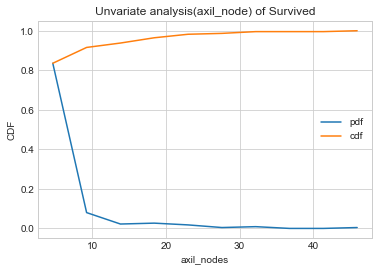

In [53]:
#Survived
count,bin_edges=np.histogram(cancer_survived['axil_nodes'],bins=10,density=True)

#pdf
pdf=count/(sum(count))
# get cumulative sum
cdf=np.cumsum(pdf)

p=plt.plot(bin_edges[1:],pdf,label='pdf')
c=plt.plot(bin_edges[1:],cdf, label='cdf')
plt.ylabel('CDF')
plt.xlabel('axil_nodes')
plt.legend()
plt.title('Unvariate analysis(axil_node) of Survived')
plt.show()


### Conclusion:
    - 90% of the patients who had axil node less than 9, have survived.

### PDF and CDF of Dead patients based on axil_nodes

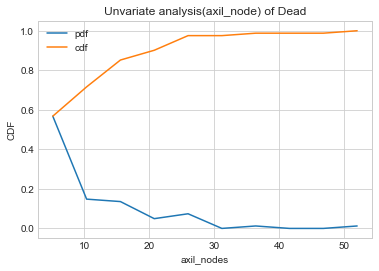

In [54]:
#R.I.P
count,bin_edges=np.histogram(cancer_died['axil_nodes'],bins=10,density=True)

#pdf
pdf=count/(sum(count))
# get cumulative sum
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.ylabel('CDF')
plt.xlabel('axil_nodes')
plt.legend()
plt.title('Unvariate analysis(axil_node) of Dead')
plt.show()

### Conclusions:
    - 70% of the dead , had less than or equal to 10 axil_nodes.

### PDF and CDF of survived and dead patients based on axil_nodes

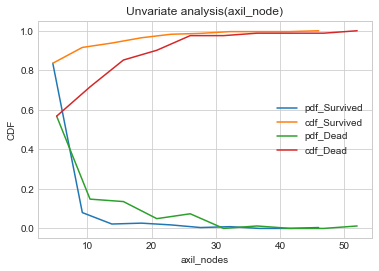

In [55]:
#Survived
count,bin_edges=np.histogram(cancer_survived['axil_nodes'],bins=10,density=True)

#pdf
pdf=count/(sum(count))
# get cumulative sum
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf_Survived')
plt.plot(bin_edges[1:], cdf,label='cdf_Survived')
plt.legend()
plt.ylabel('CDF')
plt.xlabel('axil_nodes')

#R.I.P
count,bin_edges=np.histogram(cancer_died['axil_nodes'],bins=10,density=True)

#pdf
pdf=count/(sum(count))
# get cumulative sum
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf_Dead')
plt.plot(bin_edges[1:], cdf,label='cdf_Dead')
plt.legend()
plt.title('Unvariate analysis(axil_node)')


plt.show()


### Conclusions:
    -  if axil node <= 10 :
            - 90% probabilty that the patient survived.
            - 70% probabilty that the patient died.


### Box plots

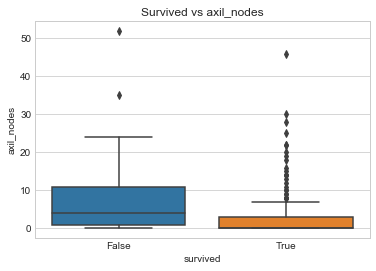

In [56]:
sns.boxplot(x='survived',y='axil_nodes',data=cancer).set_title('Survived vs axil_nodes')
plt.show()

### Conclusions:
    - if the patient had axil_nodes between 5-11, the probability of his death was approx. 25% more than patients having axil_nodes less than 5.

### Violin plots

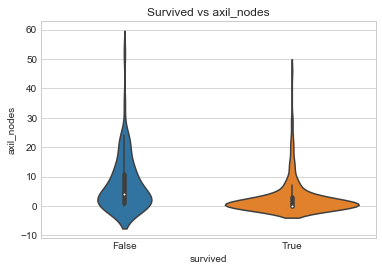

In [57]:
sns.violinplot(x="survived", y="axil_nodes", data=cancer, size=8).set_title('Survived vs axil_nodes')
plt.show()

# Summarizing all the above Conclusions drawn from the EDA:
    1.  36% of the patients died within 5 years.
        64% of the patients survived. (Imbalanced)
    2.  Irespective of age and operation_year, its quite evident that when a patient had 
        zero axil_nodes its more likely they survived.
    3.  No possibility of seperating the dead/survived linearly.
    4.  if axil node <= 10 :
            90% probabilty that the patient survived.
            70% probabilty that the patient died.
    5.  if the patient had axil_nodes between 5-11, the probability of his death was approx. 25% more than patients having axil_nodes less than 5.